In [20]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def load_data(path_npz):
    """Return the data from path_npz.

    Parameters
    ----------
    path_npz : str
        Path to *.npz file containing reaction data.
 
    """

    # load data
    data = np.load(path_npz)

    # check consistency of data arrays shape

    # check_data_consistency(data)

    print(f"{path_npz} number of data points: {data['Z'].shape[0]}")

    # # get data corresponding to reaction
    # data = get_data_subset(data, rxn_num[3:])

    # # remove appended zero to data arrays

    # data = get_data_remove_appended_zero(data)

    # get unique reaction numbers included in data
    rxn_nums = np.unique(data['RXN'])
    print(f"{path_npz} reactions: {rxn_nums}")

    # only use the first reaction if there are multiple
    rxn_num = f"rxn{rxn_nums[0]}"

    # from parse():
        #     Returns
        # -------
        # dict: A dictionary with following keys:
        #     'R': positions, array of (n_snapshots, n_atoms, 3)
        #     'Z': atomic numbers, array of (n_snapshots, n_atoms)
        #     'E': energy, array of (n_snapshots, 1)
        #     'F': forces, array of (n_snapshots, n_atoms, 3)


    # # coords: ndarray, shape=(M, N, 3)
    # #     The 3D array of atomic coordinates for M data points and N atoms.
    # R_data = data['R']
    # print(f"R shape: {R_data.shape}")
    # print(R_data[0])

    #     nums : ndarray, shape=(M, N)
    #     The 2D array of atomic numbers for M data points and N atoms
    Z_data = data['Z']
    print(f"Z shape: {Z_data.shape}")
    print(Z_data[0])
    
    # # nmber of atoms??
    # N_data = data['N']
    # print(f"N shape: {N_data.shape}")
    # print(N_data[0])

    # # energy
    # E_data = data['E']
    # print(f"E shape: {E_data.shape}")
    # print(E_data[0])

    # # force
    # F_data = data['F']
    # print(f"F shape: {F_data.shape}")
    # print(F_data[0])

    # # reaction numbers??
    # RXN_data = data['RXN']
    # print(f"RXN shape: {RXN_data.shape}")
    # print(RXN_data[0])


    # NOTE: it appears that the "coordination numbers" used as an axis here are the typical
    # chemical meaning of coordination number. The coordination number is larger where the
    # pairwise distance is smaller, following a Fermi-Dirac distribution. The `dist` variable
    # tells it which atoms to look at. 
    # # get reaction data
    # cn1s = rxn_dict[rxn_num]['cn1']
    # cn2s = rxn_dict[rxn_num]['cn2']
    # mu = rxn_dict[rxn_num]['mu']

    # # make namedtuple for plotting
    # cn1 = get_cn_arrays(data['Z'], data['R'], cn1s, mu=mu[0], sigma=3.0)
    # cn2 = get_cn_arrays(data['Z'], data['R'], cn2s, mu=mu[1], sigma=3.0)
    # data_namedtuple = get_rxn_namedtuple(cn1, cn2, data['E'].flatten())

    # return data_namedtuple, rxn_num

    return data

In [37]:
data = load_data('../H2COMBUSTION_DATA-main-2/09_aimd.npz')
data0 = data['R'][0][0:3]
print(data0)
data_final = data['R'][-1][0:3]
print(data_final)

../H2COMBUSTION_DATA-main-2/09_aimd.npz number of data points: 10000
../H2COMBUSTION_DATA-main-2/09_aimd.npz reactions: ['09']
Z shape: (10000, 6)
[8 8 1 0 0 0]
[[ 0.45079539  0.27415085  0.        ]
 [-0.67358807 -0.14918442  0.        ]
 [ 1.78722626 -1.00024778  0.        ]]
[[ 0.4391632   0.33248807  0.03931035]
 [-0.68892331 -0.16769409 -0.00689691]
 [ 2.2152166  -1.63233651 -0.51442206]]


In [10]:
ircdata = scipy.io.loadmat('./irc09.mat')['irc09'][0][0][3]
print(ircdata.shape)
x0 = ircdata[:, 0].T
print(x0)
xfinal = ircdata[:, -1].T
print(xfinal)

(9, 60)
[ 7.69500916e-01  1.07996856e-01 -2.47400000e-07 -4.91696250e-01
 -2.66217751e-01  6.00000000e-09  1.28662911e+00 -7.17060477e-01
  9.70000000e-09]
[ 2.85196718e-01  4.16905608e-01  3.46000000e-07 -7.96082818e-01
 -9.82397166e-02  6.80000000e-09  2.07531949e+00 -1.19394720e+00
 -1.20100000e-07]


In [13]:
traj_ae_1 = np.loadtxt('trajectories_AE_1.txt', delimiter=',')
traj_pca_1 = np.loadtxt('trajectories_PCA_1.txt', delimiter=',')

In [15]:
traj_ae_1.shape
traj_pca_1.shape

(1001, 9)

In [38]:
def dist_between(arr1, arr2):
    atoms1 = arr1.reshape((3,3))
    atoms2 = arr2.reshape((3,3))
    total_dist = 0.0
    for i in range(3):
        total_dist += np.linalg.norm(atoms1[i] - atoms2[i])

    return total_dist

print(traj_ae_1[0])
dist_between(traj_ae_1[0], data0)


[ 0.72795852  0.1066204   0.01065013 -0.55640539 -0.22924762  0.02882093
  1.38357172 -0.61532064  0.10201321]


1.0358757207097598

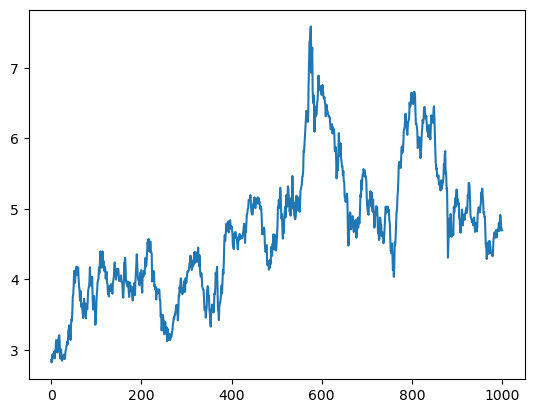

In [46]:
origin = np.array([0,0,0,0,0,0,0,0,0])
ae_dists_to_final = [dist_between(elem, origin) for elem in traj_ae_1]

plt.plot(ae_dists_to_final)

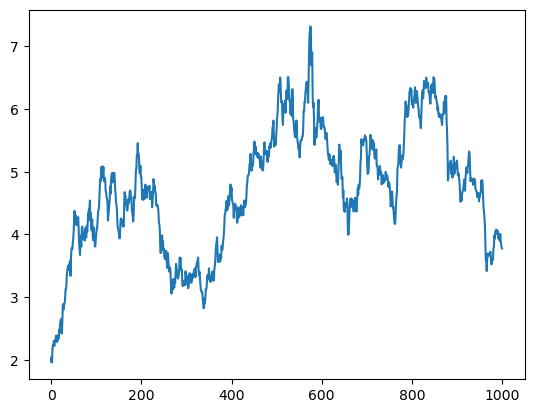

In [41]:
ae_dists_to_final = [dist_between(elem, data_final) for elem in traj_ae_1]

plt.plot(ae_dists_to_final)

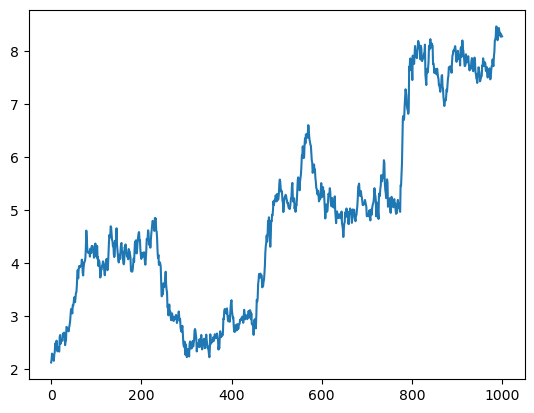

In [40]:
pca_dists_to_final = [dist_between(elem, data_final) for elem in traj_pca_1]

plt.plot(pca_dists_to_final)

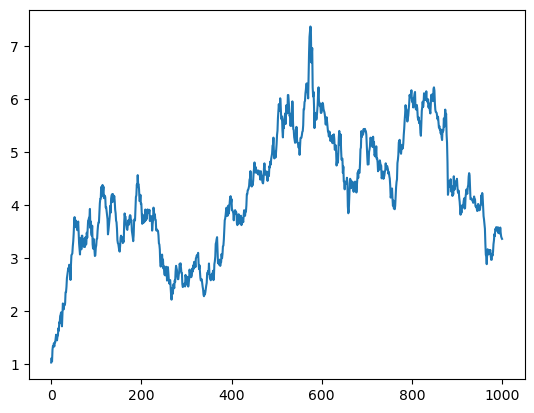

In [42]:
ae_dists_to_start = [dist_between(elem, data0) for elem in traj_ae_1]

plt.plot(ae_dists_to_start)

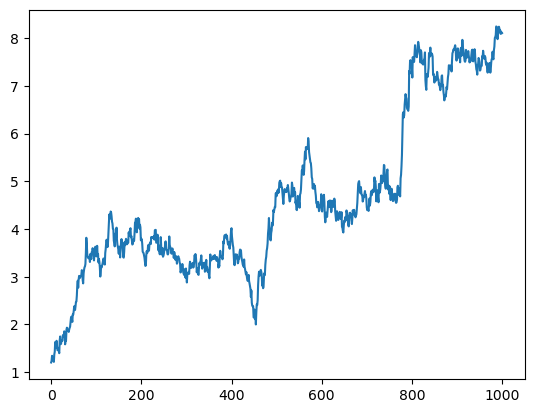

In [43]:
pca_dists_to_start = [dist_between(elem, data0) for elem in traj_pca_1]

plt.plot(pca_dists_to_start)